 # MNIST classification with Keras
 ## Convolutional Neural Networks
 http://ml4a.github.io/guides/convolutional_neural_networks/
 
 Dataset is collection of handwritten numbers
 
 (Loss Function) if predicted is not equal to actual: return 1 else: return 0

In [1]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

n_train, n_test, height, width

Using Theano backend.


(60000, 10000, 28, 28)

In [2]:
from keras.utils.np_utils import to_categorical

# we have to preprocess the data into the right form
X_train = X_train.reshape(n_train, 1, height, width).astype('float32')
X_test = X_test.reshape(n_test, 1, height, width).astype('float32')

# normalize from [0, 255] to [0, 1]
X_train /= 255.0
X_test /= 255.0

# numbers 0-9, so ten classes
n_classes = 10

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [3]:
from keras.models import Sequential
model = Sequential()

In [4]:
# number of convolutional filters
n_filters = 32

# convolution filter size
# i.e. we will use a n_conv x n_conv filter
n_conv = 3

# pooling window size
# i.e. we will use a n_pool x n_pool pooling window
n_pool = 2

In [5]:
from keras.layers import Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D

model.add(Convolution2D(
        n_filters, n_conv, n_conv,

        # apply the filter to only full parts of the image
        # (i.e. do not "spill over" the border)
        # this is called a narrow convolution
        border_mode='valid',

        # we have a 28x28 single channel (grayscale) image
        # so the input shape should be (1, 28, 28)
        input_shape=(1, height, width)
))
model.add(Activation('relu'))

model.add(Convolution2D(n_filters, n_conv, n_conv))
model.add(Activation('relu'))

# then we apply pooling to summarize the features
# extracted thus far
model.add(MaxPooling2D(pool_size=(n_pool, n_pool)))

In [6]:
from keras.layers import Dropout, Flatten, Dense

model.add(Dropout(0.25))

# flatten the data for the 1D layers
model.add(Flatten())

# Dense(n_outputs)
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# the softmax output layer gives us a probablity for each class
model.add(Dense(n_classes))
model.add(Activation('softmax'))

In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [8]:
# how many examples to look at during each training iteration
batch_size = 128

# how many times to run through the full set of examples
n_epochs = 10

# the training may be slow depending on your computer
graph = model.fit(X_train,
          y_train,
          batch_size=batch_size,
          nb_epoch=n_epochs,
          validation_data=(X_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 171s - loss: 0.2794 - acc: 0.9146 - val_loss: 0.0630 - val_acc: 0.9795
Epoch 2/10
60000/60000 [==============================] - 174s - loss: 0.0999 - acc: 0.9702 - val_loss: 0.0412 - val_acc: 0.9865
Epoch 3/10
60000/60000 [==============================] - 173s - loss: 0.0734 - acc: 0.9777 - val_loss: 0.0354 - val_acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 175s - loss: 0.0625 - acc: 0.9812 - val_loss: 0.0315 - val_acc: 0.9903
Epoch 5/10
60000/60000 [==============================] - 172s - loss: 0.0532 - acc: 0.9834 - val_loss: 0.0344 - val_acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 175s - loss: 0.0466 - acc: 0.9861 - val_loss: 0.0315 - val_acc: 0.9901
Epoch 7/10
60000/60000 [==============================] - 174s - loss: 0.0442 - acc: 0.9862 - val_loss: 0.0311 - val_acc: 0.9911
Epoch 8/10
60000/60000 [=======================

In [9]:
# how'd we do?
loss, accuracy = model.evaluate(X_test, y_test)
print('loss:', loss)
print('accuracy:', accuracy)

10000/10000 [==============================] - 10s    
loss: 0.0299118065929
accuracy: 0.9905


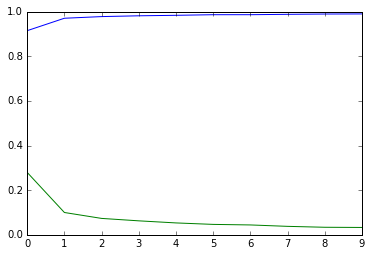

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(graph.history["acc"])
plt.plot(graph.history["loss"])